In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn
import statistics


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from collections import OrderedDict
from sklearn.externals import joblib


C:\Users\Elise\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### L'étude dure 2h30 soit 9000 s (validé par figure 1)
Chaque activité prend comme temps :
* Sitting 10 min -> 600 s
* Stairs 5 min -> 300 s
* Table Soccer 5min -> 300 s
* Cycling 8 min -> 480 s
* driving car 15 min -> 900 s
* Lunch break 30 min -> 1800 s
* Walking 1min -> 600 s
* Working 8 min -> 1200 s


Nous allons dans un premier temps étudier le sujet 7 afin de comparer à la figure 1

In [2]:
chemin = 'C:/Users/Elise/Documents/Esilv/5emeAnnee/PythonForDataAnalysis/Projet/PPG_FieldStudy/S7/S7.pkl'
data =  pd.read_pickle(chemin)

In [3]:
data

{'rpeaks': array([    633,    1428,    2197, ..., 6538533, 6539057, 6539681]),
 'signal': {'chest': {'ACC': array([[ 0.87160003,  0.02540004, -0.15560001],
          [ 0.87100005,  0.02260005, -0.15859997],
          [ 0.87020004,  0.02320004, -0.15899998],
          ...,
          [ 0.93079996, -0.06120002, -0.2062    ],
          [ 0.93060005, -0.0564    , -0.21259999],
          [ 0.93120003, -0.0546    , -0.21380001]]),
   'ECG': array([[ 0.12437439],
          [ 0.13188171],
          [ 0.13829041],
          ...,
          [-0.08843994],
          [-0.08757019],
          [-0.08258057]]),
   'EMG': array([[-1.5],
          [-1.5],
          [-1.5],
          ...,
          [-1.5],
          [-1.5],
          [-1.5]]),
   'EDA': array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   'Temp': array([[-273.15],
          [-273.15],
          [-273.15],
          ...,
          [-273.15],
          [-273.15],
          [-273.15

# 1) Analyse de données

In [4]:
print('Nombre de keys : ' + str(len(data.keys())) )
print('Nom des keys : ' + str(data.keys()))

Nombre de keys : 6
Nom des keys : dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])


In [5]:
print('Sujet : ' + str(data['subject']))
print('Caractéristique du sujet : '+ str(data['questionnaire']))

Sujet : S7
Caractéristique du sujet : {'WEIGHT': 58.0, 'Gender': ' f', 'AGE': 21, 'HEIGHT': 168.0, 'SKIN': 3, 'SPORT': 2}


### 1.1. Etude du label

Le label est les valeurs des battements de coeur mesurés sur 8 secondes avec 2 secondes de repos, reporté sur 1 min
La moyenne des battements par minute est : 86.68667454907391
Le nombre de battements minimum par minute est : 48.63469322902146
Le nombre de battements maximum par minute est : 152.9134108074917


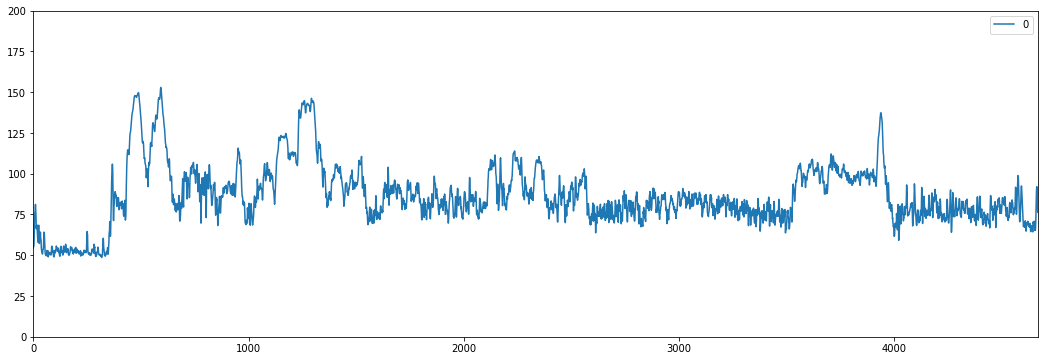

In [6]:
print('Le label est les valeurs des battements de coeur mesurés sur 8 secondes avec 2 secondes de repos, reporté sur 1 min')
print('La moyenne des battements par minute est : ' +str(data['label'].mean()))
print('Le nombre de battements minimum par minute est : ' +str(data['label'].min()))
print('Le nombre de battements maximum par minute est : ' +str(data['label'].max()))
dflabel = pd.DataFrame(data['label'])
dflabel.plot(yticks=range(0,225,25),figsize=(18,6))

### On met à l'échelle des 9000 s

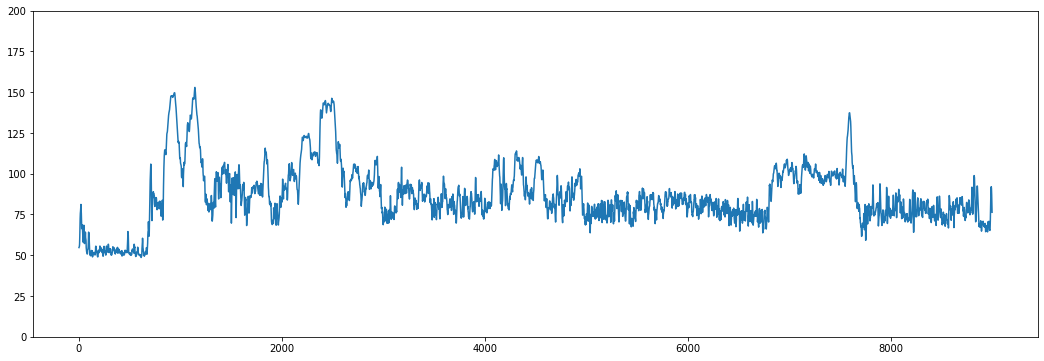

In [7]:
plt.figure(figsize = (18,6))
plt.plot(dflabel.index*(9000/len(dflabel)), dflabel)
plt.yticks(range(0,225,25))
plt.show()

### 1.2. Etude de l'activité

On affiche le nombre de fois où on a réalisé l'activité : 
Transient periods(ID: 0)
Sitting (ID: 1)
Ascending and descending stairs (ID: 2)
Table soccer (ID: 3): Playing table soccer
Cycling (ID: 4)
Driving a car (ID: 5)
Lunch break (ID: 6)
Walking (ID: 7)
Working (ID: 8)


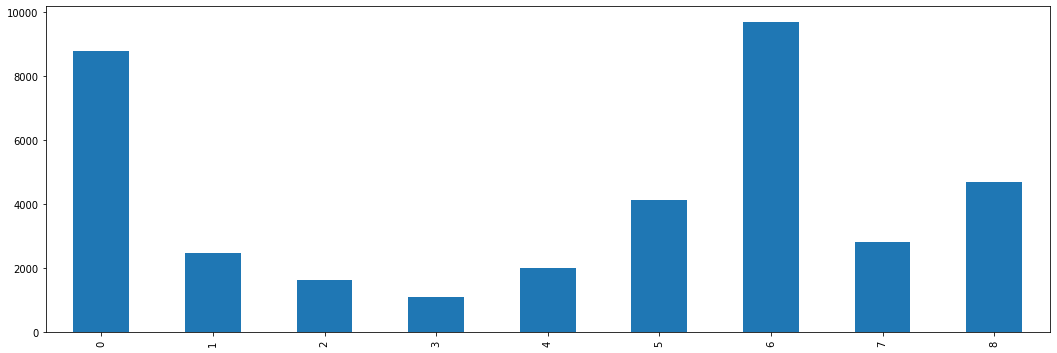

In [8]:
dfactivity = pd.DataFrame(data['activity'])
#On ajoute la colonne ci-après afin de pouvoir sommer
dfactivity['nb'] = 1
activity = dfactivity.groupby([0], as_index=False).sum()
print('On affiche le nombre de fois où on a réalisé l\'activité : ')
print('Transient periods(ID: 0)\nSitting (ID: 1)\nAscending and descending stairs (ID: 2)\nTable soccer (ID: 3): Playing table soccer\nCycling (ID: 4)\nDriving a car (ID: 5)\nLunch break (ID: 6)\nWalking (ID: 7)\nWorking (ID: 8)')
activity['nb'].plot(kind = "bar", figsize=(18,6))

### J'essaie de retrouver le même schéma que la figure 1 du ReadMe

In [9]:
print('Nombre de secondes que dure une activité : ' + str(9000/len(pd.DataFrame(data['activity']))))

Nombre de secondes que dure une activité : 0.24082200577972815


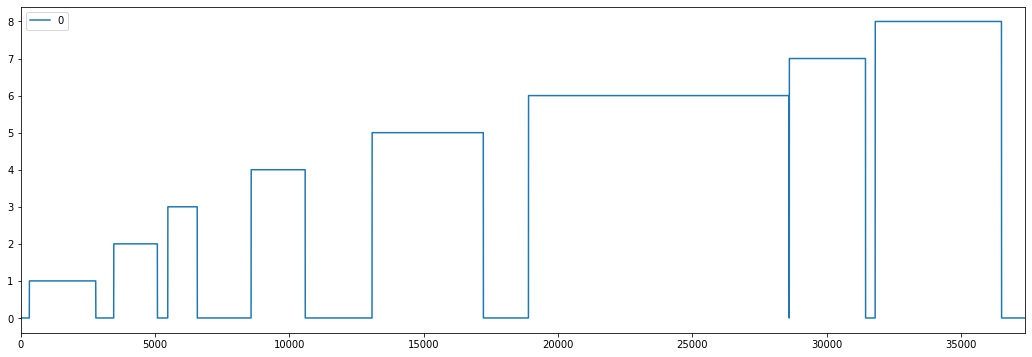

In [10]:
dfactivity = pd.DataFrame(data['activity'])
dfactivity.plot(figsize=(18,6))

### On met à l'échelle des 9000 s

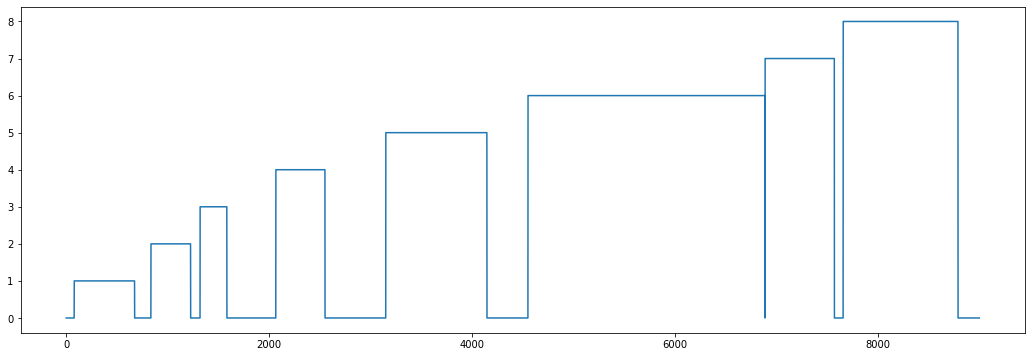

In [11]:
dfactivity = pd.DataFrame(data['activity'])
plt.figure(figsize = (18,6))
plt.plot(dfactivity.index*(9000/len(dfactivity)), dfactivity)

plt.show()

### 1.3. Etude du lien entre activity et label (figure 1 du ReadMe)

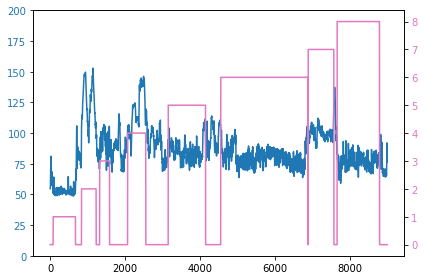

In [12]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.plot(dflabel.index*(9000/len(dflabel)), dflabel, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks(range(0,225,25))


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
ax2.plot(dfactivity.index*(9000/len(dfactivity)), dfactivity, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## 2. Création d'un dataframe regroupant tous les sujets

In [13]:
alldatas = {}
for i in range(1,16):
    print(i)
    alldatas[i] = pd.read_pickle(f"C:/Users/Elise/Documents/Esilv/5emeAnnee/PythonForDataAnalysis/Projet/PPG_FieldStudy/S"+str(i)+"/S"+str(i)+".pkl")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [14]:
pd.DataFrame(alldatas)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
activity,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
label,"[49.611369076105795, 50.323992482870175, 52.70...","[70.92296570347261, 71.29105527689472, 68.6938...","[52.904905990895365, 52.4832848965976, 53.5990...","[69.33133569178202, 74.23985397460334, 80.6865...","[96.0906143466522, 101.29797045926367, 108.862...","[105.03603052300089, 109.08819284696261, 111.7...","[54.71764132217654, 55.17330164858371, 55.3930...","[57.91516848266533, 59.1418718794675, 61.37444...","[66.60310756946997, 66.72622532983297, 67.1437...","[64.28235587205951, 63.349710123072235, 64.568...","[73.41463469471395, 78.43265402408036, 82.3741...","[54.98420867920524, 56.68301554508546, 58.1600...","[63.79889727455826, 65.42809985054454, 65.7692...","[72.6747289184089, 76.95480136227845, 73.42384...","[51.789772141788326, 53.95587356823631, 59.379..."
questionnaire,"{'WEIGHT': 78.0, 'Gender': ' m', 'AGE': 34, 'H...","{'WEIGHT': 80.0, 'Gender': ' m', 'AGE': 28, 'H...","{'WEIGHT': 60.0, 'Gender': ' m', 'AGE': 25, 'H...","{'WEIGHT': 57.0, 'Gender': ' m', 'AGE': 25, 'H...","{'WEIGHT': 70.0, 'Gender': ' f', 'AGE': 21, 'H...","{'WEIGHT': 70.0, 'Gender': ' f', 'AGE': 37, 'H...","{'WEIGHT': 58.0, 'Gender': ' f', 'AGE': 21, 'H...","{'WEIGHT': 70.0, 'Gender': ' m', 'AGE': 43, 'H...","{'WEIGHT': 60.0, 'Gender': ' f', 'AGE': 28, 'H...","{'WEIGHT': 56.0, 'Gender': ' f', 'AGE': 55, 'H...","{'WEIGHT': 62.0, 'Gender': ' f', 'AGE': 24, 'H...","{'WEIGHT': 105.0, 'Gender': ' m', 'AGE': 43, '...","{'WEIGHT': 63.0, 'Gender': ' f', 'AGE': 21, 'H...","{'WEIGHT': 67.0, 'Gender': ' f', 'AGE': 26, 'H...","{'WEIGHT': 79.0, 'Gender': ' m', 'AGE': 28, 'H..."
rpeaks,"[240, 1174, 2128, 3099, 3907, 4733, 5404, 6382...","[33, 700, 1316, 1932, 2536, 3094, 3661, 4220, ...","[337, 1103, 1897, 2673, 3496, 4295, 5103, 5901...","[206, 910, 1510, 2150, 2768, 3331, 3911, 4505,...","[71, 519, 976, 1440, 1874, 2331, 2783, 3225, 3...","[31, 464, 891, 1313, 1726, 2132, 2534, 2924, 3...","[633, 1428, 2197, 2971, 3739, 4507, 5241, 5963...","[217, 960, 1697, 2433, 3116, 3836, 4560, 5297,...","[486, 1161, 1829, 2473, 3095, 3709, 4291, 4886...","[560, 1194, 1851, 2503, 3168, 3800, 4448, 5137...","[553, 1181, 1804, 2417, 3009, 3591, 4121, 4655...","[669, 1496, 2303, 3089, 3838, 4552, 5267, 5989...","[226, 961, 1673, 2376, 2968, 3585, 4253, 4867,...","[7, 707, 1377, 2028, 2629, 3162, 3678, 4199, 4...","[506, 1267, 2097, 2945, 3778, 4607, 5380, 6170..."
signal,{'chest': {'ACC': [[ 0.85640001 -0.06779999 -0...,{'chest': {'ACC': [[0.91139996 0.03219998 0.05...,{'chest': {'ACC': [[ 0.90460002 -0.06120002 -0...,{'chest': {'ACC': [[ 0.90859997 -0.15979999 0...,{'chest': {'ACC': [[ 0.88940001 -0.25019997 -0...,{'chest': {'ACC': [[ 0.79540002 -0.167 -0...,{'chest': {'ACC': [[ 0.87160003 0.02540004 -0...,{'chest': {'ACC': [[ 0.90740001 -0.04100001 0...,{'chest': {'ACC': [[ 0.84739995 -0.00819999 -0...,{'chest': {'ACC': [[ 0.91760004 -0.01779997 -0...,{'chest': {'ACC': [[ 0.91779995 -0.0054 0...,{'chest': {'ACC': [[ 0.89100003 -0.01200002 -0...,{'chest': {'ACC': [[0.89300001 0.06099999 0.17...,{'chest': {'ACC': [[ 0.89300001 0.12619996 -0...,{'chest': {'ACC': [[ 0.86740005 0.16139996 -0...
subject,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15


Il est facile de mettre à l'échelle des 9000s pour un plot mais afin d'anticiper notre X pour la classification il faut que nous les mettions tous à l'échelle. Comme notre y sera activity et que celle-ci est à 4Hz on va tout ramener à 4 Hz.

Créons une fonction qui nous permettra de tout mettre à la bonne échelle

In [15]:
def mise_echelle_4H(datas, freq):
    temp = []
    nombre_division = int(freq / 4)
    
    for i in range(0, len(datas), nombre_division):
        temp.append((sum(datas[i:i+nombre_division]) / nombre_division))
    return temp

In [16]:
for k,v in alldatas.items():
    
    dfactivity = pd.DataFrame.from_dict(v["activity"])
    dfactivity.rename(columns={0:'activity'}, inplace=True)
    
    #On a besoin de répéter les données afin d'éviter les Nan 
    temp=v['label'].repeat(len(v['activity'])/len(v['label'])).tolist()
    #On obtient pas le bon nombre de valeur car il prend l'entier inférieur. 
    #Afin de ne pas fausser les valeurs on rajoute la moyenne des valeurs 
    temp.extend([statistics.mean(v['label'])] * (len(v['activity'])-len(temp)))
    dflabel = pd.DataFrame(temp)
    dflabel.rename(columns={0:'label'}, inplace=True)
    
    v["signal"]["chest"]["ECG"] = mise_echelle_4H(v["signal"]["chest"]["ECG"], 700)
    dfecg =pd.DataFrame.from_dict(v["signal"]["chest"]["ECG"])
    dfecg.rename(columns={0:'ecg'}, inplace=True)
    
    v["signal"]["chest"]["ACC"] = mise_echelle_4H(v["signal"]["chest"]["ACC"], 700)
    dfchestacc = pd.DataFrame.from_dict(v["signal"]["chest"]["ACC"])
    dfchestacc.rename(columns={0:'xchest',1:'ychest',2:'zchest'}, inplace=True)
    
    v["signal"]["chest"]["Resp"] = mise_echelle_4H(v["signal"]["chest"]["Resp"], 700)    
    dfresp=pd.DataFrame.from_dict(v["signal"]["chest"]["Resp"])
    dfresp.rename(columns={0:'resp'}, inplace=True)

    dfallchest = pd.concat([dfchestacc,dfecg , dfresp], axis=1)
    
    
    dftemp=pd.DataFrame.from_dict(v["signal"]["wrist"]["TEMP"])
    dftemp.rename(columns={0:'temp'}, inplace=True)
    
    v["signal"]["wrist"]["ACC"] = mise_echelle_4H(v["signal"]["wrist"]["ACC"], 32)
    dfwristacc = pd.DataFrame.from_dict(v["signal"]["wrist"]["ACC"])
    dfwristacc.rename(columns={0:'xwrist', 1:'ywrist', 2:'zwrist'}, inplace=True)
    
    v["signal"]["wrist"]["BVP"] = mise_echelle_4H(v["signal"]["wrist"]["BVP"], 64)
    dfbvp=pd.DataFrame.from_dict(v["signal"]["wrist"]["BVP"])
    dfbvp.rename(columns={0:'bvp'}, inplace=True )
    
    dfallwrist = pd.concat([dfwristacc, dfbvp, dftemp], axis=1)
    
    
    
    #On multipplie par la taille de dfallwrist afin de répéter sur toutes les lignes l'id des sujets
    #C'est le même principe pour les informations des sujets
    dfid=pd.DataFrame([v['subject'][1:]] * len(dfallwrist))
    dfid.rename(columns = {0:'IDSubject'}, inplace=True)
    
    questionnaire = v["questionnaire"]
    dfquestionnaire = pd.DataFrame.from_dict(questionnaire, orient = 'index').T
    dfquestionnaire = pd.concat([dfquestionnaire]*len(dfallwrist), ignore_index=True)
    

    dfalldatas = pd.concat([dfid,dfquestionnaire,dfactivity,dflabel,dfallchest, dfallwrist], axis=1)
    
    alldatas[k] = dfalldatas


dfalldataframes = pd.concat([alldatas[1],alldatas[2],alldatas[3],alldatas[4],alldatas[5],alldatas[6],alldatas[7],alldatas[8],alldatas[9],alldatas[10],alldatas[11],alldatas[12],alldatas[13],alldatas[14],alldatas[15]])
dfalldataframes

,IDSubject,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,activity,label,xchest,ychest,zchest,ecg,resp,xwrist,ywrist,zwrist,bvp,temp
0,1,78,m,34,182,3,6,0.0,49.611369,0.852157,-0.066488,-0.367784,0.035650,4.834438,-0.763672,-0.076172,0.669922,0.138125,32.13
1,1,78,m,34,182,3,6,0.0,49.611369,0.851262,-0.066655,-0.370442,0.103145,4.238839,-0.763672,-0.078125,0.671875,-26.262500,32.16
2,1,78,m,34,182,3,6,0.0,49.611369,0.851570,-0.064677,-0.370251,0.099101,2.058559,-0.761719,-0.078125,0.671875,-40.959375,32.16
3,1,78,m,34,182,3,6,0.0,49.611369,0.852142,-0.065486,-0.371278,-0.170757,-0.463981,-0.753906,-0.078125,0.671875,24.173125,32.16
4,1,78,m,34,182,3,6,0.0,49.611369,0.851958,-0.065894,-0.370466,-0.036633,-1.867397,-0.761719,-0.076172,0.671875,25.781250,32.16
5,1,78,m,34,182,3,6,0.0,49.611369,0.853454,-0.066655,-0.367393,0.027540,-1.400373,-0.763672,-0.078125,0.671875,8.678125,32.15
6,1,78,m,34,182,3,6,0.0,49.611369,0.848446,-0.068993,-0.377715,0.119724,0.611511,-0.755859,-0.076172,0.673828,-17.215625,32.15
7,1,78,m,34,182,3,6,0.0,49.611369,0.848849,-0.063319,-0.363015,0.134410,2.554940,-0.765625,-0.070312,0.671875,-35.286875,32.15
8,1,78,m,34,182,3,6,0.0,50.323992,0.847730,-0.070083,-0.379448,-0.212572,2.310625,-0.751953,-0.078125,0.671875,21.870000,32.15
9,1,78,m,34,182,3,6,0.0,50.323992,0.848426,-0.065433,-0.378317,-0.074286,0.124163,-0.755859,-0.078125,0.671875,28.181250,32.15


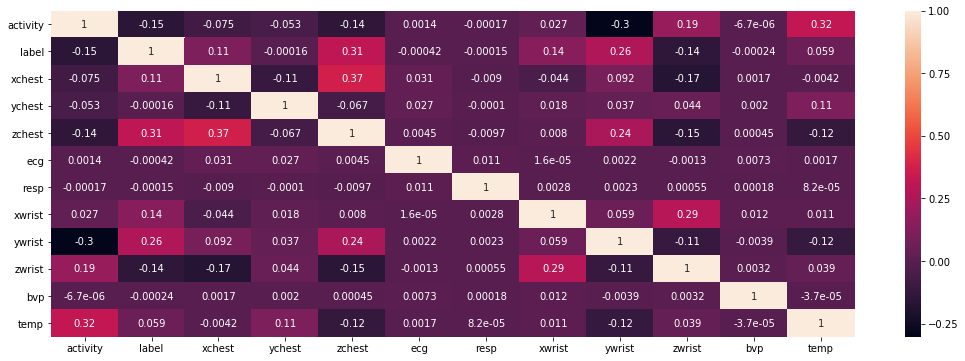

In [17]:
matrix_correlation = dfalldataframes.corr()

plt.figure(figsize = (18,6))
seaborn.heatmap(matrix_correlation,annot=True)
plt.show()

On remarque qu'hormis les x,y,z des accélérations c'est l'ativity qui est le plus fortement corrélée. On va donc la choisir en y pour notre classification.

## 3. Classification 

## 3.1. On récupère notre X et y

On fait attention à ne pas prendre l'ID car cela pourrait fausser les données

In [18]:
X = dfalldataframes[['AGE','SPORT','label','xchest','ychest','zchest','ecg','resp','xwrist','ywrist','zwrist','bvp','temp']]
y = dfalldataframes[['activity']]

X.shape, y.shape

((517956, 13), (517956, 1))

Pour passer le y en array 1d on utilise y.ravel()

## 3.2. On divise en jeu de test et apprentissage

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), random_state=1234)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((388467, 13), (129489, 13), (388467,), (129489,))

On retrouve bien le splitage ratio

In [21]:
[tuple_[0]/X.shape[0] for tuple_ in (X_train.shape, X_test.shape, y_train.shape, y_test.shape)]

[0.75, 0.25, 0.75, 0.25]

In [22]:
performances = dict()

Il est préférable de standardiser les valeurs

In [23]:
scaler   = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test   = scaler.transform(X_test)

### On crée une fonction de tout ceci afin de pouvoir l'utiliser après

In [24]:
def get_score(algorithme, X_train, X_test, y_train, y_test, display_graph=False, display_options=True):
    if display_options:
        print("fitting :\n"+ str(algorithme))
        print("X_train:{} , X_test:{} ,  y_train:{} ,  y_test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    modele = algorithme.fit(X_train, y_train)
    score  = modele.score(X_test, y_test)
    if display_graph:
        import matplotlib.pyplot as plt
        plt.scatter(x=y_test, y=algorithme.predict(X_test)) ## Predictions against True values
    return score

## 3.3. DecisionTreeClassifier

In [25]:
Decisionalgo = DecisionTreeClassifier()
score = get_score(Decisionalgo, X_train, X_test, y_train, y_test)
performances[Decisionalgo] = score

fitting :
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
X_train:(388467, 13) , X_test:(129489, 13) ,  y_train:(388467,) ,  y_test:(129489,)


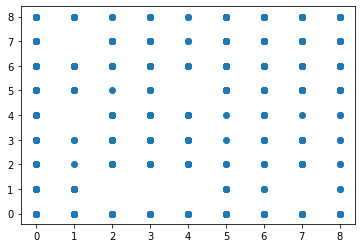

In [26]:
plt.scatter(x=y_test, y=Decisionalgo.predict(X_test))

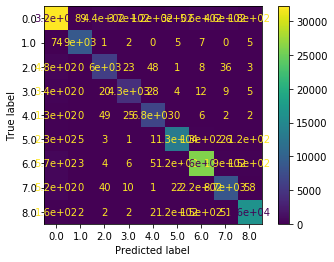

In [27]:
plot_confusion_matrix(Decisionalgo, X_test, y_test)

In [28]:
# On va utiliser la cross validation afin de valider la robustesse de notre modèle. Cela évite donc le coup de chance
results = cross_val_score(Decisionalgo, X, y, cv=KFold(shuffle=True, n_splits=5))
display(results, results.mean(), results.std())

array([0.94921423, 0.94935854, 0.94921373, 0.9482484 , 0.94907859])

0.9490226965388402

0.0003971461430884595

## 3.4. RandomForestClassifier

In [29]:
hyperparametres = { 'n_estimators':30 }
RandomFalgo = RandomForestClassifier(**hyperparametres)
score = get_score(RandomFalgo, X_train, X_test, y_train, y_test)
performances[RandomFalgo] = score

fitting :
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
X_train:(388467, 13) , X_test:(129489, 13) ,  y_train:(388467,) ,  y_test:(129489,)


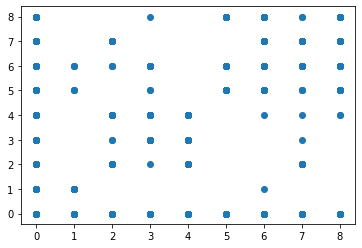

In [30]:
plt.scatter(x=y_test, y=RandomFalgo.predict(X_test))

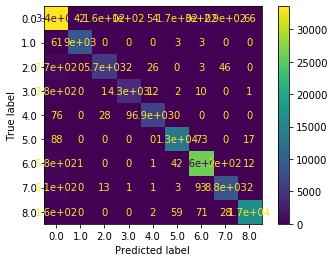

In [31]:
plot_confusion_matrix(RandomFalgo, X_test, y_test)

In [32]:
# On va utiliser la cross validation afin de valider la robustesse de notre modèle. Cela évite donc le coup de chance
results = cross_val_score(RandomFalgo, X, y.values.ravel(), cv=KFold(shuffle=True, n_splits=5))
display(results, results.mean(), results.std())

array([0.96543169, 0.96604917, 0.96507419, 0.96418608, 0.9661264 ])

0.965373506517567

0.0007108223283664603

## 3.5. ExtraTreesClassifier

In [33]:
ExtraTreesalgo = ExtraTreesClassifier()
score      = get_score(ExtraTreesalgo, X_train, X_test, y_train, y_test)
performances[ExtraTreesalgo] = score

fitting :
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
X_train:(388467, 13) , X_test:(129489, 13) ,  y_train:(388467,) ,  y_test:(129489,)


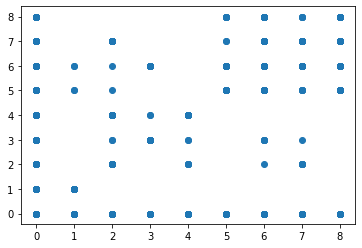

In [34]:
plt.scatter(x=y_test, y=ExtraTreesalgo.predict(X_test))

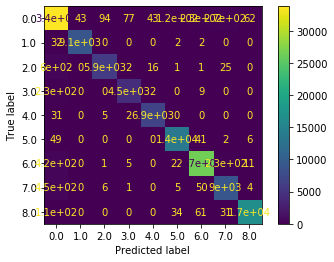

In [35]:
plot_confusion_matrix(ExtraTreesalgo, X_test, y_test)

In [36]:
# On va utiliser la cross validation afin de valider la robustesse de notre modèle. Cela évite donc le coup de chance
results = cross_val_score(ExtraTreesalgo, X, y.values.ravel(), cv=KFold(shuffle=True, n_splits=5))
display(results, results.mean(), results.std())

array([0.97402309, 0.97539362, 0.97435105, 0.97394561, 0.97352087])

0.9742468476545442

0.0006314735418387296

## 3.6. AdaBoostClassifier

In [37]:
AdaBoostalgo = AdaBoostClassifier(n_estimators=100, random_state=1234)
score      = get_score(AdaBoostalgo, X_train, X_test, y_train, y_test)
performances[AdaBoostalgo] = score

fitting :
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1234)
X_train:(388467, 13) , X_test:(129489, 13) ,  y_train:(388467,) ,  y_test:(129489,)


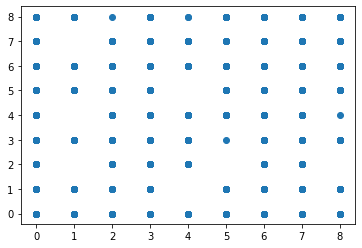

In [38]:
plt.scatter(x=y_test, y=AdaBoostalgo.predict(X_test))

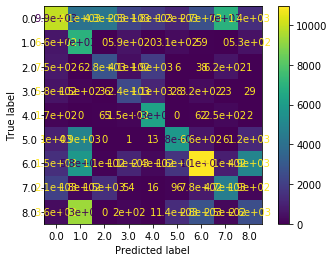

In [39]:
plot_confusion_matrix(AdaBoostalgo, X_test, y_test)

In [ ]:
# On va utiliser la cross validation afin de valider la robustesse de notre modèle. Cela évite donc le coup de chance
results = cross_val_score(AdaBoostalgo, X, y.values.ravel(), cv=KFold(shuffle=True, n_splits=5))
display(results, results.mean(), results.std())

## 3.7 Matrice de confusion && cross validation

On remarque que la matrice de confusion de ExtraTreesClassifier est celle où il y a le plus de 0. Cela veut dire qu'il n'y a pas d'écart entre les valeurs réelles et celles qui ont été prédites. On peut donc imaginer (cela est validé juste après) que c'est la meilleur classification.
La cross validation, comme dit précédemment dans les commentaires, permet de vérifier que le score obtenu n'est pas un coup de chance. En comparant avec les données sorties en 3.8 on voit bien que ce n'est pas le cas.

## 3.8. Comparaison des résultats de nos modèles

In [41]:
dico_ordonne = OrderedDict(performances)
df = pd.DataFrame()
df["perf"] = dico_ordonne.values()
df["algo"] = dico_ordonne.keys()
df['nom_algo'] = df.algo.apply(lambda algo: str(algo).split('(')[0])
df.set_index('nom_algo', inplace=True)
df

,perf,algo
nom_algo,,
DecisionTreeClassifier,0.947733,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
RandomForestClassifier,0.963951,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
ExtraTreesClassifier,0.973449,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig..."
AdaBoostClassifier,0.405100,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."


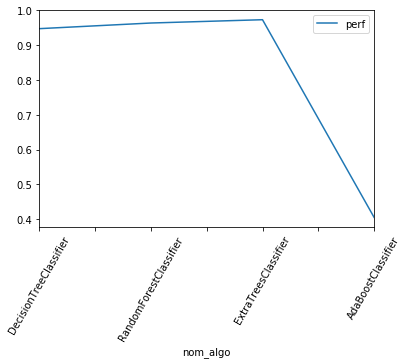

In [42]:
df[["perf"]].plot(kind='line', rot=60)

# 4. API

In [43]:
scaler =  StandardScaler()
X = scaler.fit_transform(X)

In [44]:
lm = ExtraTreesClassifier()
lm.fit(X, y.values.ravel())

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

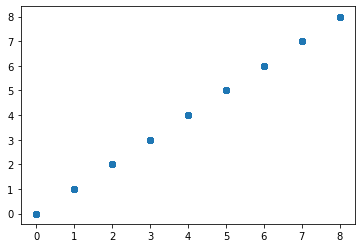

In [45]:
plt.scatter(y, lm.predict(X))

In [46]:
joblib.dump(lm, "model_simple.sav")

['model_simple.sav']

In [47]:
joblib.dump(scaler, "scaler.sav")

['scaler.sav']

On va sortir les données où l'avitivité est 3, 4, 5 afin de les prendre en exemple pour les appels API

In [48]:
dfalldataframes[dfalldataframes['activity'].isin([3,4,5])]

,IDSubject,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,activity,label,xchest,ychest,zchest,ecg,resp,xwrist,ywrist,zwrist,bvp,temp
4840,1,78,m,34,182,3,6,3.0,72.351744,0.879395,0.025536,-0.305749,-0.216031,5.970677,-0.375000,0.919922,0.287109,-4.740625,31.19
4841,1,78,m,34,182,3,6,3.0,72.351744,0.881194,0.034921,-0.285168,-0.052839,6.944101,-0.234375,0.902344,0.511719,1.695000,31.17
4842,1,78,m,34,182,3,6,3.0,72.351744,0.867521,0.011057,-0.310926,0.102951,5.928606,-0.337891,0.849609,0.287109,-1.386250,31.17
4843,1,78,m,34,182,3,6,3.0,72.351744,0.886159,0.016960,-0.303013,-0.204415,3.613264,-0.464844,0.861328,0.298828,-2.639375,31.17
4844,1,78,m,34,182,3,6,3.0,72.351744,0.861021,-0.044222,-0.308679,-0.069245,0.823565,-0.433594,0.873047,0.531250,-4.063125,31.17
4845,1,78,m,34,182,3,6,3.0,72.351744,0.866784,-0.091787,-0.316507,0.103658,-1.588754,-0.367188,0.914062,0.294922,40.978125,31.19
4846,1,78,m,34,182,3,6,3.0,72.351744,0.869649,-0.120330,-0.310119,-0.007622,-3.416024,-0.359375,0.851562,0.208984,-1.156875,31.19
4847,1,78,m,34,182,3,6,3.0,72.351744,0.874761,-0.138093,-0.314290,-0.041330,-5.904785,-0.390625,0.916016,0.328125,-42.841250,31.19
4848,1,78,m,34,182,3,6,3.0,69.188518,0.883811,-0.143551,-0.294051,0.124480,-7.518938,-0.400391,0.910156,0.316406,-7.156250,31.19
4849,1,78,m,34,182,3,6,3.0,69.188518,0.863662,-0.111953,-0.284570,0.135071,-6.556135,-0.402344,0.900391,0.220703,-12.091875,31.19


On pourra donc tester l'api avec :


* { "AGE" :34,"SPORT" : 6, "label":64.445762,"xchest":0.902179,"ychest":-0.094961,"zchest":-0.164311,"ecg":-0.009536,"resp":2.399754,"xwrist":-0.761719,"ywrist":0.654297,"zwrist":-0.107422,"bvp":51.646250,"temp":31.17, "activity": null}

Cela devrait retourner activity : 3 -> ligne 4869

* { "AGE" :28, "SPORT" : 5, "label":72.570850,"xchest":0.764709,"ychest":0.181334,"zchest":-0.458506,"ecg":0.030851,"resp":2.384870,"xwrist":-0.523438,"ywrist":-0.160156,"zwrist":0.818359,"bvp":84.511875,"temp":33.68, "activity": null}

Cela devrait retourner activity : 5 -> ligne 15100